# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)

# Read Data

In [2]:
data = pd.read_csv('../01-Data/DataGas.csv', parse_dates=['Analysis_Date', 'Last_Day_of_Analyses_of_Week'])

In [3]:
data.sample(10)

,Unnamed:_0,Analysis_Date,Last_Day_of_Analyses_of_Week,Macroregion,State,Product,No_of_Gas_Stations_Analyzed,Measurement_Unit,Mean_Price,Std_Dev,Min_Price,Max_Price,Mean_Price_Margin,Coefficient_of_variation,Mean_Dist_Price,Distribution_Std_Dev,Distribution_Min_Price,Distribution_Max_Price,Distribution_Coefficient_of_Variation,Month,Year
15453,74754,2015-05-24,2015-05-30,CENTRO OESTE,MATO GROSSO,GASOLINA COMUM,142,R$/l,3.348,0.175,3.020,3.750,0.453,0.052,2.895,0.059,2.785,3.0131,0.02,5,2015
13173,61803,2013-10-06,2013-10-12,NORDESTE,SERGIPE,GASOLINA COMUM,56,R$/l,2.862,0.091,2.689,3.060,0.407,0.032,2.455,0.059,2.34,2.5911,0.024,10,2013
7583,19647,2009-10-18,2009-10-24,SUL,PARANA,GASOLINA COMUM,431,R$/l,2.525,0.069,2.257,2.699,0.274,0.027,2.251,0.045,2.0687,2.39,0.02,10,2009
18547,92049,2017-08-06,2017-08-12,NORTE,TOCANTINS,GASOLINA COMUM,23,R$/l,3.968,0.172,3.600,4.199,0.669,0.043,3.299,0.092,3.21,3.4174,0.028,8,2017
6943,19007,2009-04-26,2009-05-02,NORDESTE,BAHIA,GASOLINA COMUM,419,R$/l,2.532,0.161,2.290,2.954,0.335,0.064,2.197,0.067,2.11,2.4747,0.03,4,2009
12599,58593,2013-05-12,2013-05-18,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,737,R$/l,3.005,0.114,2.720,3.699,0.395,0.038,2.61,0.075,2.23,2.8117,0.029,5,2013
21176,106763,2019-06-23,2019-06-29,NORDESTE,MARANHAO,GASOLINA COMUM,121,R$/l,4.514,0.141,4.349,4.940,0.636,0.031,3.878,0.102,3.7688,4.16,0.026,6,2019
2438,14502,2006-02-12,2006-02-18,NORDESTE,PERNAMBUCO,GASOLINA COMUM,434,R$/l,2.622,0.080,2.390,2.840,0.438,0.031,2.184,0.048,2.1039,2.3823,0.022,2,2006
19483,97312,2018-04-08,2018-04-14,NORDESTE,PIAUI,GASOLINA COMUM,68,R$/l,4.213,0.146,3.999,4.610,0.343,0.035,3.87,0.058,3.7844,3.9691,0.015,4,2018
11849,23913,2012-10-28,2012-11-03,SUL,PARANA,GASOLINA COMUM,565,R$/l,2.655,0.147,2.290,2.999,0.344,0.055,2.311,0.068,2.21,2.595,0.029,10,2012


In [4]:
data.columns

Index(['Unnamed:_0', 'Analysis_Date', 'Last_Day_of_Analyses_of_Week',
       'Macroregion', 'State', 'Product', 'No_of_Gas_Stations_Analyzed',
       'Measurement_Unit', 'Mean_Price', 'Std_Dev', 'Min_Price', 'Max_Price',
       'Mean_Price_Margin', 'Coefficient_of_variation', 'Mean_Dist_Price',
       'Distribution_Std_Dev', 'Distribution_Min_Price',
       'Distribution_Max_Price', 'Distribution_Coefficient_of_Variation',
       'Month', 'Year'],
      dtype='object')

# Target Analysis

## Train and Validation Split (Simple Holdout)

In [5]:
data_train = data[data['Last_Day_of_Analyses_of_Week'] < '2011-01-01']
data_valid = data[data['Last_Day_of_Analyses_of_Week'] >= '2011-01-01']

data_train.shape, data_valid.shape

((9233, 21), (11961, 21))

In [8]:
data_train['diff_1_Mean_Price'] = data_train.groupby(['State'])['Mean_Price'].apply(lambda row: row.diff().shift(-1))

## Plot Graphic 

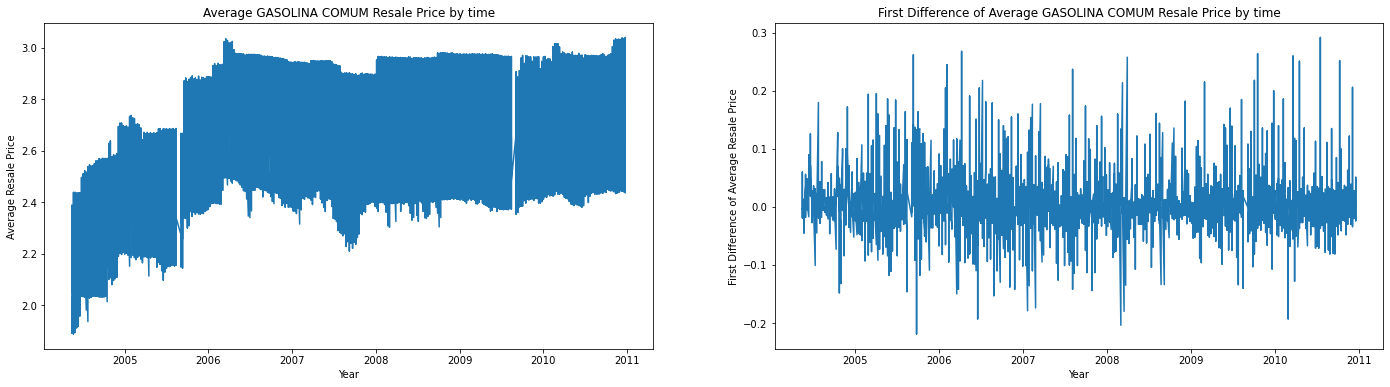

In [9]:
plt.figure(figsize=[24,6])


plt.subplot(1, 2, 1)
plt.plot('Last_Day_of_Analyses_of_Week', 'Mean_Price', data=data_train)
plt.xlabel('Year')
plt.ylabel('Average Resale Price')
plt.title('Average GASOLINA COMUM Resale Price by time')


plt.subplot(1, 2, 2)
plt.plot('Last_Day_of_Analyses_of_Week', 'diff_1_Mean_Price', data=data_train)
plt.xlabel('Year')
plt.ylabel('First Difference of Average Resale Price')
plt.title('First Difference of Average GASOLINA COMUM Resale Price by time')

    
    
plt.show()

#### In the first column we can see that the average resale price for each product is not stationary, but after the first difference (second column) this difficulty is controlled and makes future analyses simpler